| variables          | source_responses | source_items | source_pageviews | source_media | source_description | notes                                                        |
|--------------------|------------------|--------------|------------------|--------------|---------------------|--------------------------------------------------------------|
| **release**            | responses        | NA           | page_views       | media_views   | checkpoints         | release version (version of the book, e.g., 5.0.1, 5.1, 5.3); named for the github branch for the materials                   |
| **institution_id**     | responses        | items        | page_views       | media_views   | checkpoints         | a unique identifier for the institution the class was taken at |
| **class_id**           | responses        | items        | page_views       | media_views   | checkpoints         | a unique identifier for this particular class                  |
| **student_id**        | responses        | items        | page_views       | media_views   | checkpoints         | a unique identifier for this particular class                  |
| **response**           | responses        | NA           | NA               | NA           | checkpoints         | the value of the response: either the value (for shorttext, plaintext, ratings, datacamp, etc.) or an array of numbers indicating the position of the multiple choice answers chosen and which correspond to the columns lrn_option_. |
| **construct**          | NA               | NA           | NA               | NA           | checkpoints         | The psychological construct measured by the pulse-check item. One of cost, expectancy, Intrinstic Value, Utility Value. These items are meant to gauge the student's attitudes about the content being studied. |
| **chapter_number**     | responses        | items        | NA               | media_views   | checkpoints         | the chapter (as a number). Probably redundant information     |
| **EOC**                | NA               | NA           | NA               | NA           | checkpoints         | proportion of correct answers for end of chapter questions for current chapter |
| **n_possible**         | NA               | NA           | NA               | NA           | checkpoints         | The number of end-of-chapter questions for the current chapter and so the highest possible score. |
| **n_correct**          | NA               | NA           | NA               | NA           | checkpoints         | The number of end-of-chapter questions that were correct for the current chapter |
| **n_attempt**          | NA               | NA           | NA               | NA           | checkpoints         | The number of attempts to answer the end of chapter questions as a whole. For example, if there were three questions, and the 2nd question was attempted twice, the n_attempts is 4. |


In [6]:
import pandas as pd

# Read the dataset
df = pd.read_csv("checkpoints.csv")

# Create a copy of the DataFrame
df_copy = df.copy()

# Drop rows with missing values in the copy
df_copy.dropna(inplace=True)

# Drop rows with 'n_attempt' values greater than 750 in the copy
df_copy.drop(df_copy[df_copy['n_attempt'] > 1000].index, inplace=True)

df_copy.drop_duplicates(inplace=True)

In [7]:
df.shape

(79092, 12)

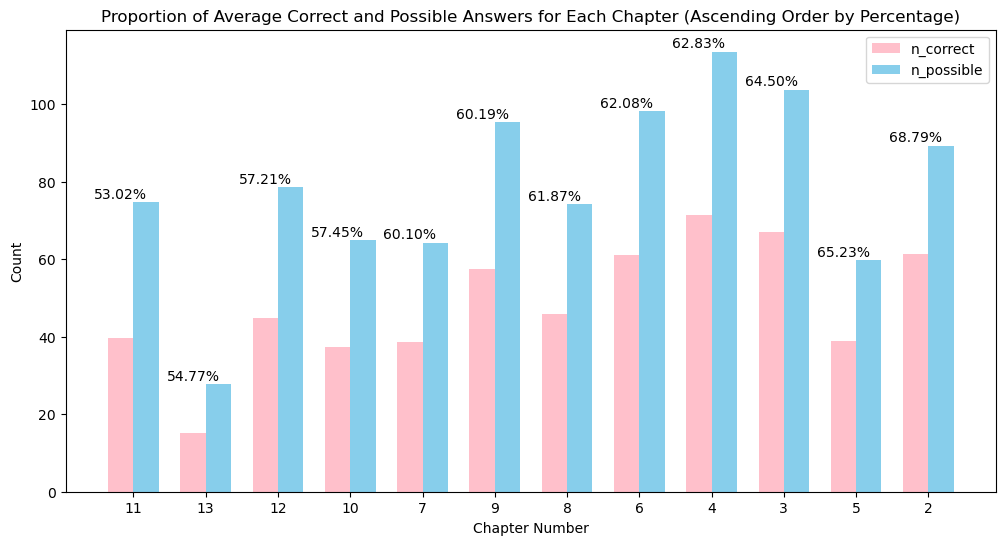

In [8]:
import matplotlib.pyplot as plt

# Group by chapter_number and calculate the mean of n_correct and n_possible
chapter_stats = df_copy.groupby('chapter_number')[['n_correct', 'n_possible']].mean()

# Calculate the percentage of n_correct relative to n_possible
chapter_stats['percentage_correct'] = (chapter_stats['n_correct'] / chapter_stats['n_possible']) * 100

# Sort the DataFrame by percentage_correct in ascending order
chapter_stats = chapter_stats.sort_values(by='percentage_correct')

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
bar_positions = range(len(chapter_stats))

rects1 = ax.bar(bar_positions, chapter_stats['n_correct'], bar_width, label='n_correct', color='pink')
rects2 = ax.bar([pos + bar_width for pos in bar_positions], chapter_stats['n_possible'], bar_width, label='n_possible', color='skyblue')

# Add text annotations for percentages
for i, (n_correct, n_possible) in enumerate(zip(chapter_stats['n_correct'], chapter_stats['n_possible'])):
    percentage = (n_correct / n_possible) * 100
    ax.text(i, max(n_correct, n_possible) + 1, f'{percentage:.2f}%', ha='center')

ax.set_xlabel('Chapter Number')
ax.set_ylabel('Count')
ax.set_title('Proportion of Average Correct and Possible Answers for Each Chapter (Ascending Order by Percentage)')
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(chapter_stats.index)
ax.legend()

plt.show()
